In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import sys, os, re


from apps.sage.sage import QuantumSage
import math
import pickle



#### NOTE: if you haven't install the package with pip install please run the following commands in code cell

dir_home = re.sub( 'QBioCode.*', 'QBioCode', os.getcwd() )

sys.path.append( dir_home )


#### Download the pre-trained model weights from: https://ibm.biz/QSageModel

In [ ]:
dir_home = ''
dir_results = os.path.join( dir_home, 'results' )

file_input = os.path.join( dir_results, 'Compiled_QMLBench_results.csv' )
# file_sage = os.path.join( dir_results, 'QMLBench_sage_mlp.pkl' )
file_sage = os.path.join( dir_results, 'QMLBench_sage.pkl' )

sage_type = 'random_forest'

In [4]:
reload = False

if (reload) or (not os.path.exists( file_input )):

    features = ['Feature_Samples_ratio', 'Intrinsic_Dimension', 'Condition number',
        'Fisher Discriminant Ratio', 'Total Correlations', 'Mutual information',
        '# Non-zero entries', '# Low variance features', 'Variation', 'std_var',
        'Coefficient of Variation %', 'std_co_of_v', 'Skewness', 'std_skew',
        'Kurtosis', 'std_kurt', 'Mean Log Kernel Density',
        'Isomap Reconstruction Error', 'Fractal dimension', 'Entropy',
        ]
    features.sort()
    metrics = ['accuracy', 'f1_score', 'time', 'auc']
    metrics.sort()


    # Get results
    path_to_compiled_results = dir_results
    if os.path.isdir(path_to_compiled_results):
        result = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path_to_compiled_results) for f in filenames if ('csv' in f) and f != 'RawDataEvaluation.csv']
        results_df = []
        for fl in result:
            if (fl != os.path.join( dir_results, 'Compiled_BatchCCC_results.csv') ) & (fl != os.path.join( dir_results, 'Compiled_QMLBench_results.csv' ) ):
                results_df.append( pd.read_csv(fl) )
        results_df = pd.concat( results_df )
        #results_df = results_df.drop(['Unnamed: 0'], axis = 1).drop_duplicates()
        for f in features:
            results_df[f] = [ round(x,4) for x in results_df[f]]
        results_df['embeddings'] = results_df['embeddings'].fillna('none')
        results_df['model'] = results_df['model'].fillna('none')
        results_df['datatype'] = [ re.sub( '\.csv', '', re.sub( '-.*', '', str(x) ) ) for x in results_df['Dataset'] ]
        results_df[ 'model_embed_datatype'] = [ '_'.join( [str(row.model), str(row.embeddings), str(row.datatype)] ) for idx, row in results_df.iterrows() ]

    else:
        results_df = pd.read_csv( path_to_compiled_results )

    results_df = results_df.reset_index(drop=True)
    results_df[results_df == math.inf] = 0
    results_df = results_df.drop_duplicates()

    results_df.to_csv( os.path.join( file_input ) )

else:
    results_df = pd.read_csv( file_input )


In [5]:
results_df

,Dataset,embeddings,# Features,# Samples,Feature_Samples_ratio,Intrinsic_Dimension,Condition number,Fisher Discriminant Ratio,Total Correlations,Mutual information,...,std_entropy,iteration,model,accuracy,f1_score,time,auc,Model_Parameters,datatype,model_embed_datatype
0,iris_binary_class_dataset.csv,pca,3,70,0.0429,2,5.8606,8.3251,0.0,0.2777,...,0.0,1,dt,1.000000,1.000000,0.002924,1.000000,"{'estimator__ccp_alpha': 0.0, 'estimator__clas...",iris_binary_class_dataset,dt_pca_iris_binary_class_dataset
1,iris_binary_class_dataset.csv,pca,3,70,0.0429,2,5.8606,8.3251,0.0,0.2777,...,0.0,1,lr,1.000000,1.000000,0.002869,1.000000,"{'estimator__C': 1.0, 'estimator__class_weight...",iris_binary_class_dataset,lr_pca_iris_binary_class_dataset
2,iris_binary_class_dataset.csv,pca,3,70,0.0429,2,5.8606,8.3251,0.0,0.2777,...,0.0,1,mlp,1.000000,1.000000,0.049234,1.000000,"{'estimator__activation': 'relu', 'estimator__...",iris_binary_class_dataset,mlp_pca_iris_binary_class_dataset
3,iris_binary_class_dataset.csv,pca,3,70,0.0429,2,5.8606,8.3251,0.0,0.2777,...,0.0,1,nb,1.000000,1.000000,0.002653,1.000000,"{'estimator__priors': None, 'estimator__var_sm...",iris_binary_class_dataset,nb_pca_iris_binary_class_dataset
4,iris_binary_class_dataset.csv,pca,3,70,0.0429,2,5.8606,8.3251,0.0,0.2777,...,0.0,1,pqk,0.966667,0.966630,1.127156,0.966667,"{'feature_map': 'ZZFeatureMap', 'feature_map_r...",iris_binary_class_dataset,pqk_pca_iris_binary_class_dataset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,iris_binary_class_dataset.csv,pca,3,70,0.0429,2,5.8606,8.3251,0.0,0.2777,...,0.0,1,qnn,0.500000,0.348837,6.487375,0.566667,"{'feature_map': 'ZZFeatureMap', 'ansatz': 'Rea...",iris_binary_class_dataset,qnn_pca_iris_binary_class_dataset
1499,iris_binary_class_dataset.csv,pca,3,70,0.0429,2,5.8606,8.3251,0.0,0.2777,...,0.0,1,qsvc,0.733333,0.728507,12.985793,0.733333,"{'feature_map': 'ZZFeatureMap', 'quantum_kerne...",iris_binary_class_dataset,qsvc_pca_iris_binary_class_dataset
1500,iris_binary_class_dataset.csv,pca,3,70,0.0429,2,5.8606,8.3251,0.0,0.2777,...,0.0,1,rf,1.000000,1.000000,0.045721,1.000000,"{'estimator__bootstrap': True, 'estimator__ccp...",iris_binary_class_dataset,rf_pca_iris_binary_class_dataset
1501,iris_binary_class_dataset.csv,pca,3,70,0.0429,2,5.8606,8.3251,0.0,0.2777,...,0.0,1,svc,1.000000,1.000000,0.004925,1.000000,"{'estimator__C': 0.01, 'estimator__break_ties'...",iris_binary_class_dataset,svc_pca_iris_binary_class_dataset


In [6]:
# select a held out dataset
held_out_df = results_df[results_df['Dataset'] == 'spirals_data-2.csv' ]
results_df = results_df[results_df['Dataset'] != 'spirals_data-2.csv' ]


In [7]:
# Load the Quantum Sage with the dataset

reload = False
if (reload) or (not os.path.exists( file_sage )):
    qs = QuantumSage(results_df)
else:
     qs = pickle.load( open(file_sage, 'rb'))


In [8]:
# Train the sage
retrain = False

if retrain or (len(qs._results_subsages) == 0):
    qs.train_sub_sages(sage_type=sage_type)
    pickle.dump( qs, open(file_sage,'wb') )

Working on accuracy
Working on dt
Working on lr
Working on mlp
Working on nb
Working on pqk
Working on qnn
Working on qsvc
Working on rf
Working on svc
Working on vqc
Working on auc
Working on dt
Working on lr
Working on mlp
Working on nb
Working on pqk
Working on qnn
Working on qsvc
Working on rf
Working on svc
Working on vqc
Working on f1_score
Working on dt
Working on lr
Working on mlp
Working on nb
Working on pqk
Working on qnn
Working on qsvc
Working on rf
Working on svc
Working on vqc


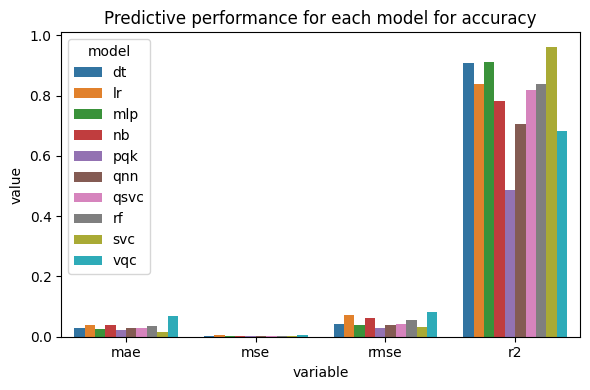

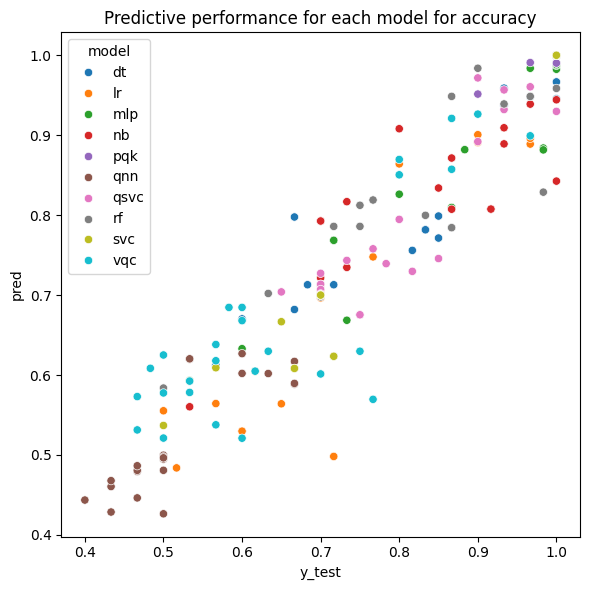

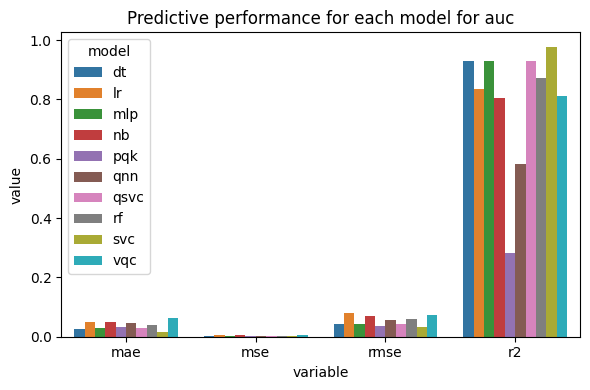

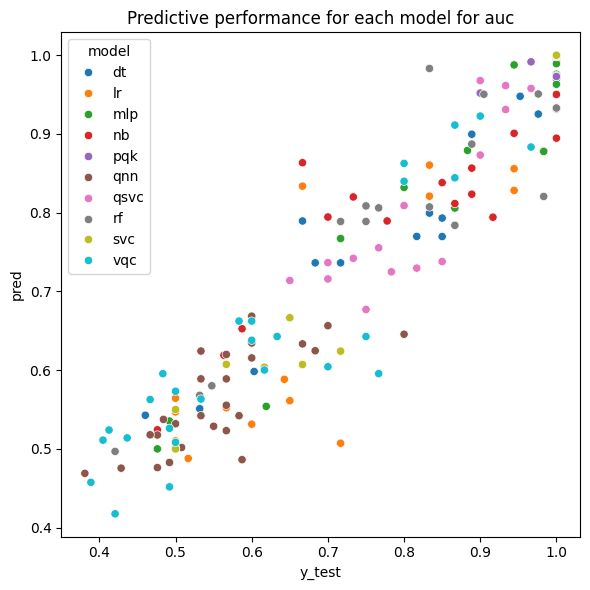

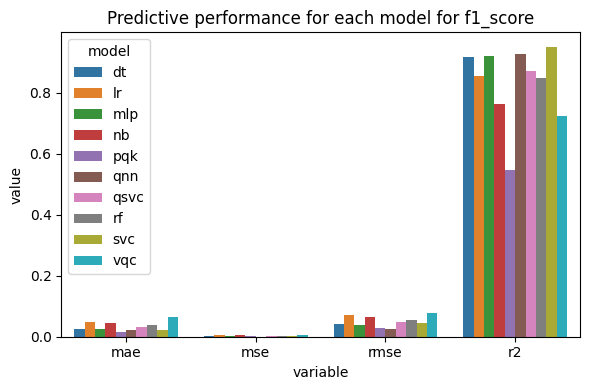

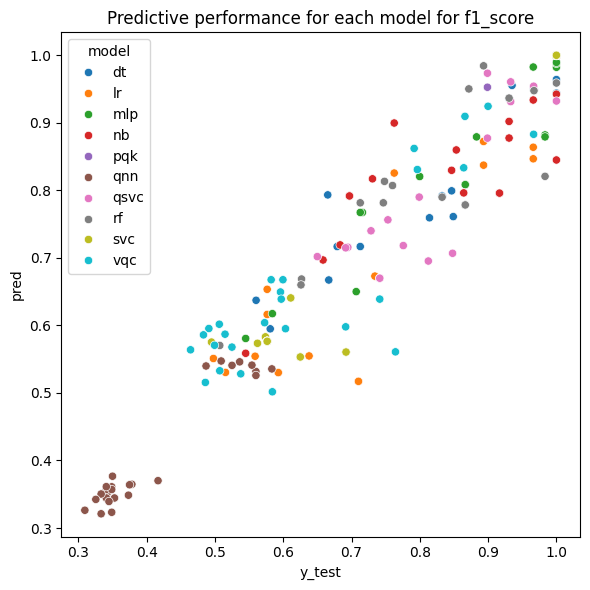

In [9]:
# Plot results from training
qs.plot_results()

### Run Held Out Data

In [10]:
_columns_data_features = [ '# Features', '# Samples',
                                'Feature_Samples_ratio', 'Intrinsic_Dimension', 'Condition number',
                                'Fisher Discriminant Ratio', 'Total Correlations', 'Mutual information',
                                '# Non-zero entries', '# Low variance features', 'Variation', 'std_var',
                                'Coefficient of Variation %', 'std_co_of_v', 'Skewness', 'std_skew',
                                'Kurtosis', 'std_kurt', 'Mean Log Kernel Density',
                                'Isomap Reconstruction Error', 'Fractal dimension', 'Entropy',
                                'std_entropy']
_columns_metrics = ['accuracy', 'f1_score', 'auc']
_columns_metadata = ['Dataset', 'embeddings','datatype', 'model_embed_datatype', 'iteration', 'model']

held_out_df_input_data_features_only = held_out_df[_columns_data_features]
held_out_df_input_data_metrics = held_out_df[_columns_metrics]
held_out_df_input_data_metadata = held_out_df[_columns_metadata]

In [11]:
held_out_df

,Dataset,embeddings,# Features,# Samples,Feature_Samples_ratio,Intrinsic_Dimension,Condition number,Fisher Discriminant Ratio,Total Correlations,Mutual information,...,std_entropy,iteration,model,accuracy,f1_score,time,auc,Model_Parameters,datatype,model_embed_datatype
980,spirals_data-2.csv,pca,3,70,0.0429,3,1.4553,0.0080,0.0000,0.1104,...,0.0,1,dt,0.933333,0.933036,0.004449,0.933333,"{'estimator__ccp_alpha': 0.0, 'estimator__clas...",spirals_data,dt_pca_spirals_data
981,spirals_data-2.csv,pca,3,70,0.0429,3,1.4553,0.0080,0.0000,0.1104,...,0.0,1,lr,0.600000,0.583333,0.004011,0.600000,"{'estimator__C': 1.0, 'estimator__class_weight...",spirals_data,lr_pca_spirals_data
982,spirals_data-2.csv,pca,3,70,0.0429,3,1.4553,0.0080,0.0000,0.1104,...,0.0,1,mlp,0.833333,0.831650,0.428999,0.833333,"{'estimator__activation': 'relu', 'estimator__...",spirals_data,mlp_pca_spirals_data
983,spirals_data-2.csv,pca,3,70,0.0429,3,1.4553,0.0080,0.0000,0.1104,...,0.0,1,nb,0.533333,0.531250,0.008985,0.533333,"{'estimator__priors': None, 'estimator__var_sm...",spirals_data,nb_pca_spirals_data
984,spirals_data-2.csv,pca,3,70,0.0429,3,1.4553,0.0080,0.0000,0.1104,...,0.0,1,qnn,0.466667,0.325581,11.108982,0.500000,"{'feature_map': 'ZZFeatureMap', 'ansatz': 'Rea...",spirals_data,qnn_pca_spirals_data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,spirals_data-2.csv,none,6,70,0.0857,3,125.5799,0.0255,7.6374,0.0398,...,0.0,3,qnn,0.500000,0.357143,22.956631,0.600000,"{'feature_map': 'ZZFeatureMap', 'ansatz': 'Rea...",spirals_data,qnn_none_spirals_data
1489,spirals_data-2.csv,none,6,70,0.0857,3,125.5799,0.0255,7.6374,0.0398,...,0.0,3,qsvc,0.766667,0.753231,40.184403,0.766667,"{'feature_map': 'ZZFeatureMap', 'quantum_kerne...",spirals_data,qsvc_none_spirals_data
1490,spirals_data-2.csv,none,6,70,0.0857,3,125.5799,0.0255,7.6374,0.0398,...,0.0,3,rf,0.833333,0.833148,0.109110,0.833333,"{'estimator__bootstrap': True, 'estimator__ccp...",spirals_data,rf_none_spirals_data
1491,spirals_data-2.csv,none,6,70,0.0857,3,125.5799,0.0255,7.6374,0.0398,...,0.0,3,svc,0.533333,0.513889,0.003524,0.533333,"{'estimator__C': 0.01, 'estimator__break_ties'...",spirals_data,svc_none_spirals_data


In [13]:
test_index = 40
metric = 'f1_score'
test_sample = pd.DataFrame(held_out_df_input_data_features_only.iloc[test_index,:]).transpose()

# Make prediction
pred = qs.predict(test_sample,metric=metric)

pred = pred.set_index('model')
test_meta = held_out_df_input_data_metadata.iloc[test_index,:]
test_indices = held_out_df_input_data_metadata[(held_out_df_input_data_metadata['embeddings'] == test_meta['embeddings']) &
                                                (held_out_df_input_data_metadata['iteration'] == test_meta['iteration']) &
                                                (held_out_df_input_data_metadata['datatype'] == test_meta['datatype']) &
                                                (held_out_df_input_data_metadata['Dataset'] == test_meta['Dataset'])
                                                ].index

test_values = []
for idx in test_indices:
   test_values.append((held_out_df_input_data_metadata.loc[idx,'model'],held_out_df_input_data_metrics.loc[idx,metric]))
test_values = pd.DataFrame(test_values, columns=['model', metric])
test_values = test_values.drop_duplicates().groupby('model').median()
test_values = test_values.sort_values(metric, ascending=False)
test_values.columns = [metric+' (actual)']
total_pred = pd.concat( [pred, test_values], axis = 1)
total_pred[metric+' (actual) * r2'] = total_pred[metric+' (actual)'] * total_pred['r2']
total_pred = total_pred.apply(lambda x : round(x,3)).fillna(0)

from scipy.stats import spearmanr, pearsonr
print(f"Spearman: {spearmanr(total_pred[metric+' (actual)'], total_pred[metric])}")
print(f"Pearson: {pearsonr(total_pred[metric+' (actual)'], total_pred[metric])}")
print(f"Spearman of weighted: {spearmanr(total_pred[metric+' (actual) * r2'], total_pred[metric+'*r2'])}")
print(f"Pearson of weighted: {pearsonr(total_pred[metric+' (actual) * r2'], total_pred[metric+'*r2'])}")

total_pred = pd.concat( [total_pred,total_pred.rank(ascending = False )], axis = 1)
total_pred

Spearman: SignificanceResult(statistic=-0.12158110873601292, pvalue=0.7379379712336098)
Pearson: PearsonRResult(statistic=-0.46259531795568637, pvalue=0.17823228962145946)
Spearman of weighted: SignificanceResult(statistic=0.32121212121212117, pvalue=0.3654683104386702)
Pearson of weighted: PearsonRResult(statistic=0.2711595617050633, pvalue=0.4485617491875942)


,f1_score,r2,f1_score*r2,f1_score (actual),f1_score (actual) * r2,f1_score,r2,f1_score*r2,f1_score (actual),f1_score (actual) * r2
model,,,,,,,,,,
qsvc,0.723,0.872,0.631,0.444,0.388,3.0,5.0,1.0,8.0,7.0
mlp,0.679,0.919,0.624,0.498,0.457,4.0,3.0,2.0,5.5,4.0
dt,0.649,0.917,0.596,0.698,0.640,5.0,4.0,3.0,2.0,2.0
nb,0.753,0.763,0.574,0.514,0.392,2.0,8.0,4.0,4.0,6.0
svc,0.575,0.950,0.547,0.524,0.498,8.0,1.0,5.0,3.0,3.0
pqk,0.975,0.548,0.534,0.000,0.000,1.0,10.0,6.0,10.0,10.0
rf,0.620,0.849,0.526,0.792,0.672,6.0,7.0,7.0,1.0,1.0
lr,0.562,0.854,0.480,0.498,0.425,9.0,6.0,8.0,5.5,5.0
vqc,0.594,0.724,0.430,0.450,0.326,7.0,9.0,9.0,7.0,8.0
